<img align="right" src = "https://raw.githubusercontent.com/arsilva87/statsbook/main/figs/figura_thumbnail.png" width="25%" height="25%">

Códigos em R do livro: **Estatística Decodificada** (Silva, A.R. 2021) 

Capítulo 5: **O método delta**
____

**Exemplo 1: Precisão da média gama**

In [2]:
x <- c(7, 6, 6, 4, 4, 3, 2, 5, 2, 4, 3, 4, 3, 2, 1)

In [3]:
negLogL <- function(pars) -sum(dgamma(x, shape = pars[1], scale = pars[2], log = TRUE))  # -logL
emv <- optim(par = c(a = 6, b = 0.7), fn = negLogL, hessian = TRUE)                      # minimização
emv                                                                                      # estimativas de MV

,a,b
a,3.665693,18.36819
b,18.368195,102.82468


In [4]:
S <- solve(emv$hessian) # matriz de covvariância
S

,a,b
a,2.6009717,-0.46462731
b,-0.4646273,0.09272448


In [5]:
# derivada parcial de f = a*b em a
g1 <- D(expression(a*b), "a")
g1

b

In [6]:
# derivada parcial de f = a*b em b
g2 <- D(expression(a*b), "b")
g2

a

In [7]:
g <- c(eval(g1, list(a = 4.571, b = 0.816)), 
       eval(g2, list(a = 4.571, b = 0.816)))
g

[1] 0.816 4.571

In [8]:
# variancia de f = a*b
v <- drop( t(g) %*% S %*% g )
v

[1] 0.2032014

In [9]:
# Apebas checando a variância da média gama
4.571 * 0.816^2 / 15

[1] 0.2029085

In [10]:
# Intervalo de 95% de confiança para f = a*b
z <- qnorm(0.975)            # quantil 0.975 da normal padrão
prod(emv$par) - z * sqrt(v)  # lim. inferior
prod(emv$par) + z * sqrt(v)  # lim. superior

[1] 2.849992

[1] 4.617012

In [ ]:
# Método delta com o pacote car  (instalar antes)
# install.packages('car')
library(car)
deltaMethod(emv$par, "a*b", S)

____
**Exemplo 2: Precisão da DL50**

Modelo logístico: $y = \frac{\exp(a + bx)}{1 + \exp(a + bx)} + \epsilon$

Dose letal 50: $DL_{50} = -\frac{\hat{a}}{\hat{b}}$

In [11]:
dose <- c(0, 0.25, 0.5, 1, 1.5, 2)           # doses do inseticida (x)
mort <- c(0, 0.06, 0.26, 0.89, 0.97, 0.98)   # proporção de insetos mortos (y)

Admita as estimativas: $\hat{a} = -3.82$ e $\hat{b} = 5.41$

Tal que: $DL_{50} = -(-3.82)/5.41 = 0.706$ g/ha

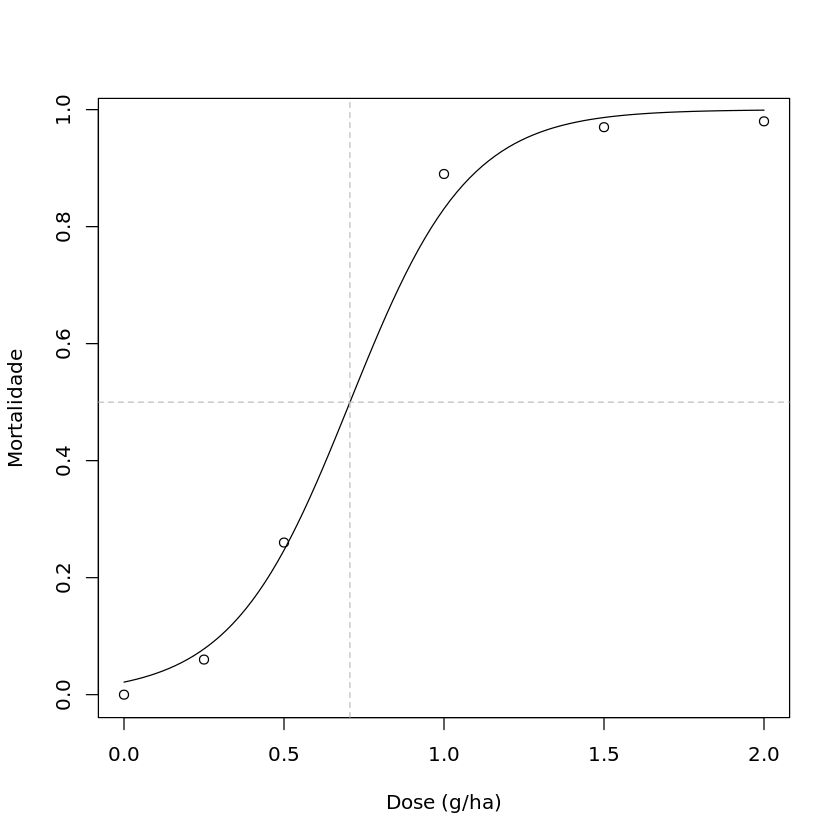

In [12]:
# Ajuste do modelo no gráfico
plot(mort ~ dose, ylab = "Mortalidade", xlab = "Dose (g/ha)")
curve(exp(-3.82 + 5.41*x)/(1 + exp(-3.82 + 5.41*x)), add = TRUE)
abline(v = 0.706, h = 0.5, lty = 2, col = "gray")

In [14]:
# Admita a matriz de covariâncias para os parânetros do modelo
mcov <- matrix(c(0.098, -0.119, -0.119, 0.189), nrow = 2)
rownames(mcov) <- colnames(mcov) <- c("a", "b")
mcov

,a,b
a,0.098,-0.119
b,-0.119,0.189


In [15]:
# derivada parcial de DL50 em função de a
g1 <- D(expression(-a/b), "a")
g1

-(1/b)

In [16]:
# derivada parcial em função de b
g2 <- D(expression(-a/b), "b")
g2

a/b^2

In [17]:
# vetor de gradientes
g <- c(eval(g1, list(a = -3.82, b = 5.41)), 
       eval(g2, list(a = -3.82, b = 5.41)))
g

[1] -0.1848429 -0.1305175

In [18]:
# desvio padrão da DL50
sqrt(t(g) %*% mcov %*% g)

0.0287425


In [ ]:
# com o pacote car
deltaMethod(c(a = -3.82, b = 5.41), "-a/b", mcov)

____
**Exercício:** calcule o desvio padrão de 

$S = -n(\theta_S - \theta_R) (1 + 1/m)^{-(1 + m)} $

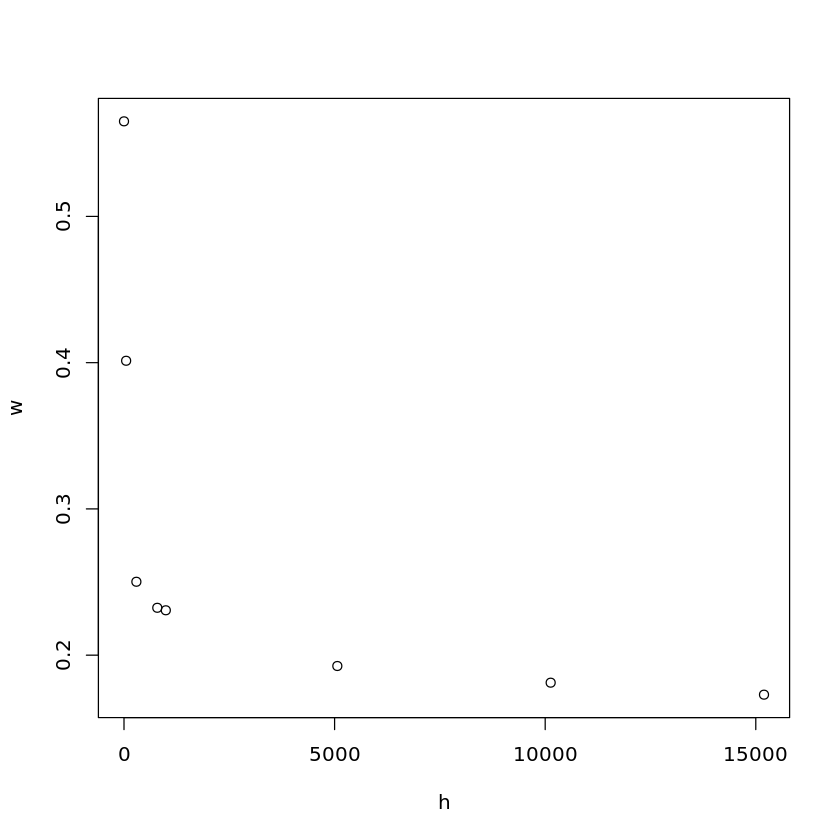

In [19]:
# dados
h <- c(0.001, 50.65, 293.77, 790.14, 992.74, 5065, 10130, 15195)
w <- c(0.5650, 0.4013, 0.2502, 0.2324, 0.2307, 0.1926, 0.1812, 0.1730)
plot(h, w)